In [1]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

from synth_dim_model import *
from paraparticle_utils import *

import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


plt.rcParams.update({'font.size': 12})

np.set_printoptions(precision=5, suppress=True, linewidth=100)


In [2]:
N = 2
M = 3
V = 1

states, formatted_states = enumerate_states(N, M)

H = construct_hamiltonian(N, M, V = 1, mu = 0, J = 0)
number_op = construct_total_paraparticle_number_operator(N)
eigenvalues, eigenvectors, paraparticle_numbers = exact_diagonalize_with_total_paraparticle_number_symmetry(H, number_op)

count = 0
for i, state in enumerate(eigenvectors):
    if np.round(paraparticle_numbers[i],3) == 2:
        count += 1
        for j in range(len(state)):
            if np.round(state[j],3) != 0:
                print(f"{state[j]}: {formatted_states[j]}")
        print()

(1+0j): |0,2>

(1+0j): |2,0>

(1+0j): |0,0>

(1+0j): |2,2>



In [3]:
def count_paraparticles(state, flavor=None):
    if flavor == "up":
        return sum(1 for s in state if s == 2)
    elif flavor == "down":
        return sum(1 for s in state if s == 0)
    elif flavor is None:
        return sum(1 for s in state if s in [0, 2])
    else:
        raise ValueError(f"Unknown flavor: {flavor}")


for i, state in enumerate(states):
    up_count = count_paraparticles(state, flavor="up")
    down_count = count_paraparticles(state, flavor="down")
    total = count_paraparticles(state)
    print(f"state {i} = |{','.join(map(str, state))}>")
    print(f"  up paraparticles: {up_count}")
    print(f"  down paraparticles: {down_count}")
    print(f"  total paraparticles: {total}")


state 0 = |0,0>
  up paraparticles: 0
  down paraparticles: 2
  total paraparticles: 2
state 1 = |0,1>
  up paraparticles: 0
  down paraparticles: 1
  total paraparticles: 1
state 2 = |0,2>
  up paraparticles: 1
  down paraparticles: 1
  total paraparticles: 2
state 3 = |1,0>
  up paraparticles: 0
  down paraparticles: 1
  total paraparticles: 1
state 4 = |1,1>
  up paraparticles: 0
  down paraparticles: 0
  total paraparticles: 0
state 5 = |1,2>
  up paraparticles: 1
  down paraparticles: 0
  total paraparticles: 1
state 6 = |2,0>
  up paraparticles: 1
  down paraparticles: 1
  total paraparticles: 2
state 7 = |2,1>
  up paraparticles: 1
  down paraparticles: 0
  total paraparticles: 1
state 8 = |2,2>
  up paraparticles: 2
  down paraparticles: 0
  total paraparticles: 2


In [4]:
for i, _ in enumerate(states):
    vector = np.zeros(M**N)
    vector[i] = 1
    print(f"basis state {i} = {vector} * {formatted_states[i]}")
    print(f"has {vector.conj().T @ number_op @ vector} paraparticles")
    
# so if a state has a zero, it has a "down" paraparticle
# and if a state has a 2, it has an "up" paraparticle

basis state 0 = [1. 0. 0. 0. 0. 0. 0. 0. 0.] * |0,0>
has 2.0 paraparticles
basis state 1 = [0. 1. 0. 0. 0. 0. 0. 0. 0.] * |0,1>
has 1.0 paraparticles
basis state 2 = [0. 0. 1. 0. 0. 0. 0. 0. 0.] * |0,2>
has 2.0 paraparticles
basis state 3 = [0. 0. 0. 1. 0. 0. 0. 0. 0.] * |1,0>
has 1.0 paraparticles
basis state 4 = [0. 0. 0. 0. 1. 0. 0. 0. 0.] * |1,1>
has 0.0 paraparticles
basis state 5 = [0. 0. 0. 0. 0. 1. 0. 0. 0.] * |1,2>
has 1.0 paraparticles
basis state 6 = [0. 0. 0. 0. 0. 0. 1. 0. 0.] * |2,0>
has 2.0 paraparticles
basis state 7 = [0. 0. 0. 0. 0. 0. 0. 1. 0.] * |2,1>
has 1.0 paraparticles
basis state 8 = [0. 0. 0. 0. 0. 0. 0. 0. 1.] * |2,2>
has 2.0 paraparticles


In [5]:
from itertools import product

def generate_fixed_paraparticle_basis(N, M, N_particle):
    """Return basis states of length-N with M levels and exactly N_particle paraparticles (0s or 2s)."""
    all_states = product(range(M), repeat=N)
    return [state for state in all_states if sum(1 for s in state if s in [0, 2]) == N_particle]


In [6]:
N = 3      # number of sites
M = 3      # synthetic levels: 0, 1, 2
N_particle = 2

basis = generate_fixed_paraparticle_basis(N, M, N_particle)

for i, state in enumerate(basis):
    print(f"{i}: |{','.join(map(str, state))}>")


0: |0,0,1>
1: |0,1,0>
2: |0,1,2>
3: |0,2,1>
4: |1,0,0>
5: |1,0,2>
6: |1,2,0>
7: |1,2,2>
8: |2,0,1>
9: |2,1,0>
10: |2,1,2>
11: |2,2,1>


In [7]:
import numpy as np
from itertools import product

def generate_fixed_paraparticle_basis(N, M, N_particle):
    all_states = product(range(M), repeat=N)
    return [state for state in all_states if sum(1 for s in state if s in [0, 2]) == N_particle]

def construct_paraparticle_hamiltonian(N, M, V, N_particle, boundary_conditions="OBC"):
    basis_states = generate_fixed_paraparticle_basis(N, M, N_particle)
    dim = len(basis_states)
    H = np.zeros((dim, dim), dtype=np.complex128)
    
    # Map state tuples to indices for fast lookup
    state_to_index = {tuple(state): i for i, state in enumerate(basis_states)}

    for i, state in enumerate(basis_states):
        for site in range(N - 1):
            site_next = (site + 1) if boundary_conditions == "OBC" else (site + 1) % N
            for n in range(M):
                if n == 0:
                    # Handle PBC 0 <-> M-1 interaction
                    if boundary_conditions == "PBC" and state[site] == 0 and state[site_next] == M - 1:
                        new_state = list(state)
                        new_state[site], new_state[site_next] = M - 1, 0
                        new_state = tuple(new_state)
                        if new_state in state_to_index:
                            j = state_to_index[new_state]
                            H[i, j] += V
                            H[j, i] += V
                else:
                    if state[site] == n and state[site_next] == n - 1:
                        new_state = list(state)
                        new_state[site], new_state[site_next] = n - 1, n
                        new_state = tuple(new_state)
                        if new_state in state_to_index:
                            j = state_to_index[new_state]
                            H[i, j] += V
                            H[j, i] += V
    return H, basis_states


In [8]:
N = 12

H, basis_states = construct_paraparticle_hamiltonian(N, M = 3, V = 1, N_particle = 2)
print(np.shape(H))

print(2*N*(N-1))

(264, 264)
264


In [9]:
import numpy as np
from itertools import combinations, product
from scipy.sparse import lil_matrix

def generate_two_paraparticle_basis_np(N):
    """
    Generate two-paraparticle basis as a NumPy array.
    Each basis state is a length-N array with two sites being 0 or 2 (down or up), others 1.
    """
    basis = np.empty((2 * N * (N - 1), N), dtype=np.uint8)
    idx = 0
    for i, j in combinations(range(N), 2):
        for s1, s2 in product([0, 2], repeat=2):
            state = np.ones(N, dtype=np.uint8)
            state[i] = s1
            state[j] = s2
            basis[idx] = state
            idx += 1
    return basis

def construct_two_paraparticle_hamiltonian_sparse(N, V):
    """
    Construct the interaction-only Hamiltonian in the two-paraparticle sector using sparse matrices.
    No periodic boundary conditions.
    """
    basis = generate_two_paraparticle_basis_np(N)
    dim = basis.shape[0]
    H = lil_matrix((dim, dim), dtype=np.complex128)

    # Map each basis state (as a tuple) to its index for fast lookup
    basis_tuples = [tuple(state) for state in basis]
    state_to_index = {state: i for i, state in enumerate(basis_tuples)}

    # Precompute nearest-neighbor site pairs for open boundaries
    neighbor_pairs = [(i, i + 1) for i in range(N - 1)]

    for i, state in enumerate(basis):
        for s, s_next in neighbor_pairs:
            val_s, val_next = state[s], state[s_next]

            # For n = 1, 2: apply interaction (n, n-1) ↔ (n-1, n)
            for n in range(1, 3):
                if (val_s, val_next) == (n, n - 1) or (val_s, val_next) == (n - 1, n):
                    new_state = state.copy()
                    new_state[s], new_state[s_next] = val_next, val_s
                    j = state_to_index.get(tuple(new_state))
                    if j is not None and j >= i:  # Only fill upper triangle (Hermitian)
                        H[i, j] += V
                        if j != i:
                            H[j, i] += V

    return H.tocsr(), basis


In [10]:
N = 5
V = 1.0
H_sparse, basis = construct_two_paraparticle_hamiltonian_sparse(N, V)

print("Sparse Hamiltonian shape:", H_sparse.shape)
print("Number of nonzero entries:", H_sparse.nnz)

Sparse Hamiltonian shape: (40, 40)
Number of nonzero entries: 96


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import expm_multiply

# === Parameters ===
N = 50
V = 1.0
times = np.linspace(0, 30, 250)
dt = times[1] - times[0]

# === Build reduced Hamiltonian ===
H, basis = construct_two_paraparticle_hamiltonian_sparse(N, V)

# === Build initial state: one '2' at site N–1, one '0' at site 0 ===
initial_config = np.ones(N, dtype=np.uint8)
initial_config[0] = 0       # flavor-1
"""initial_config[N - 1] = 2    # flavor-2"""

basis_tuples = [tuple(state) for state in basis]
state_to_index = {state: i for i, state in enumerate(basis_tuples)}

# Create initial state vector
psi0 = np.zeros(len(basis), dtype=complex)
psi0[state_to_index[tuple(initial_config)]] = 1.0

# === Time evolve using expm_multiply ===
psi_t = expm_multiply(-1j * H, psi0, start=times[0], stop=times[-1], num=len(times))  # shape (T, dim)

# === Compute expectation values n_{1,i}(t) and n_{2,i}(t) ===
n1_expectation = np.zeros((len(times), N))  # for level 0
n2_expectation = np.zeros((len(times), N))  # for level 2

basis_array = np.array(basis, dtype=np.uint8)  # shape (dim, N)

for t_idx, psi in enumerate(psi_t):  # psi has shape (dim,)
    prob_density = np.abs(psi)**2  # shape (dim,)
    
    # Sum over all states weighted by probability
    for i in range(N):
        n1_expectation[t_idx, i] = np.sum((basis_array[:, i] == 0) * prob_density)
        n2_expectation[t_idx, i] = np.sum((basis_array[:, i] == 2) * prob_density)


KeyError: (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)

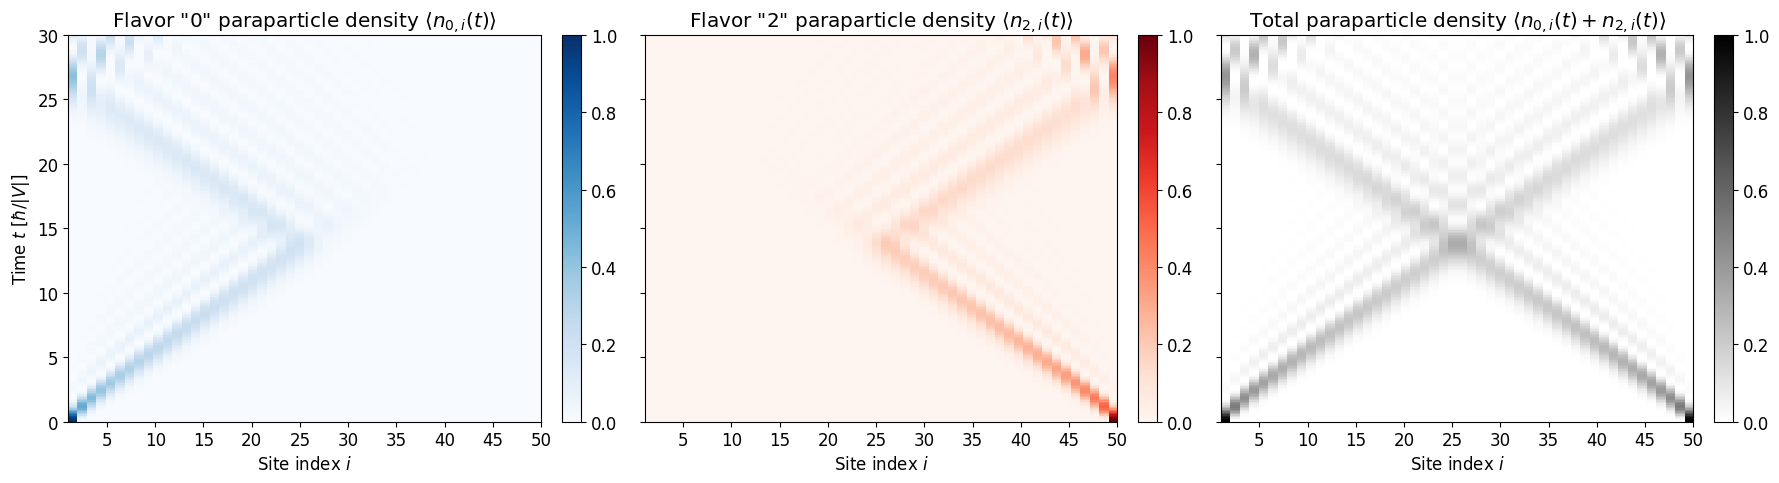

In [15]:
total_density = n1_expectation + n2_expectation

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
#fig.suptitle(f"{N} site chain")
#extent = [0, N, times[0], times[-1]]
extent = [1, N, times[0], times[-1]]  # Add +1 to x range

# Plot n1 with blue colormap
im1 = axes[0].imshow(n1_expectation, aspect='auto', origin='lower', extent=extent, cmap='Blues', interpolation='none')
axes[0].set_title(r'Flavor "0" paraparticle density $\langle n_{0,i}(t) \rangle$')

axes[0].set_xlabel('Site index $i$')
axes[0].set_ylabel('Time $t$ $[\hbar/|V|]$')

# Plot n2 with red colormap
im2 = axes[1].imshow(n2_expectation, aspect='auto', origin='lower', extent=extent, cmap='Reds', interpolation='none')
axes[1].set_title(r'Flavor "2" paraparticle density $\langle n_{2,i}(t) \rangle$')


axes[1].set_xlabel('Site index $i$')

# Plot total density with grey colormap
im3 = axes[2].imshow(total_density, aspect='auto', origin='lower', extent=extent, cmap='binary', interpolation='none')
axes[2].set_title(r'Total paraparticle density $\langle n_{0,i}(t) + n_{2,i}(t) \rangle$')
axes[2].set_xlabel('Site index $i$')

cbar1 = fig.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04)
#cbar1.set_label(r'$\langle n_{0,i} \rangle$')
cbar2 = fig.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04)
#cbar2.set_label(r'$\langle n_{2,i} \rangle$')
cbar3 = fig.colorbar(im3, ax=axes[2], fraction=0.046, pad=0.04)
#cbar3.set_label(r'$\langle n_{0,i} + n_{2,i} \rangle$')


xticks = list(range(0, N+1, 5))  # Adjust ticks to include N if desired
for ax in axes:
    ax.set_xticks(xticks)
    ax.set_xlim(1, N)  # Ensure axis range matches new extent


plt.tight_layout()
plt.show()


KeyboardInterrupt: 

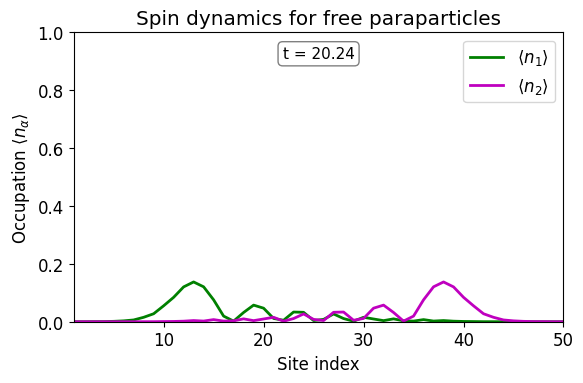

In [13]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

fig, ax = plt.subplots(figsize=(6, 4))

# two line objects (different colors)
line1, = ax.plot([], [], lw=2, color="g", label=r"$\langle n_1 \rangle$")
line2, = ax.plot([], [], lw=2, color="m", label=r"$\langle n_2 \rangle$")

ax.set_xlim(1, N)
ax.set_ylim(0, 1)
ax.set_xlabel("Site index")
ax.set_ylabel(r"Occupation $\langle n_\alpha \rangle$")
ax.legend(loc="upper right")
ax.set_title("Spin dynamics for free paraparticles")
fig.tight_layout()

time_text = ax.text(
    0.5, 0.9, "", transform=ax.transAxes,
    ha="center", va="bottom",
    fontsize=11, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", lw=1)
)

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    time_text.set_text("")
    return line1, line2, time_text

def update(frame):
    t = times[frame]
    xdata = range(1, N + 1)
    ydata1 = n1_expectation[frame]
    ydata2 = n2_expectation[frame]
    
    line1.set_data(xdata, ydata1)
    line2.set_data(xdata, ydata2)
    time_text.set_text(f"t = {t:.2f}")
    return line1, line2, time_text

ani = animation.FuncAnimation(
    fig, update, frames=len(times), init_func=init, blit=True
)

ani.save("paraparticle_dynamics.gif", writer="pillow", fps=30)
plt.close(fig)


In [ ]:
combined = n1_expectation - n2_expectation  # total "magnetization" or signed density

fig, ax = plt.subplots(figsize=(7, 5))
extent = [1, N, times[0], times[-1]]

im = ax.imshow(combined, aspect='auto', origin='lower', cmap='RdBu', extent=extent, interpolation='none')
ax.set_title(r'Paraparticle magnetization $\langle n_{0,i}(t) - n_{2,i}(t) \rangle$')
ax.set_xlabel('Site index $i$')
ax.set_ylabel('Time $t$ $[\hbar/|t|]$')
xticks = list(range(0, N + 1, 5))
ax.set_xticks(xticks)
ax.set_xlim(1, N)

fig.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()
